In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [9]:
df_1 = pd.read_csv('output.csv')
df_1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
df_1.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [12]:
df_1['price'] = df_1['price'].astype('int')
df_1['bedrooms'] = df_1['bedrooms'].astype('int')
df_1['bathrooms'] = df_1['bathrooms'].astype('int')
df_1['floors'] = df_1['floors'].astype('int')

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int32 
 2   bedrooms       4600 non-null   int32 
 3   bathrooms      4600 non-null   int32 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int32 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
dtypes: int32(4), int64(9), objec

In [14]:
df_1.drop(['date', 'street', 'city', 'statezip', 'country'], axis = 1, inplace = True)

In [15]:
df_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992


In [16]:
df_1.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0


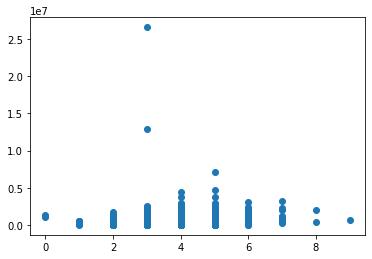

In [17]:
plt.scatter(df_1['bedrooms'], df_1['price'])
plt.show()

In [18]:
X = df_1.drop(['price'], axis = 1)
Y = df_1.price

In [19]:
Y.head()

0     313000
1    2384000
2     342000
3     420000
4     550000
Name: price, dtype: int32

In [20]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,4,2,1940,10500,1,0,0,4,1140,800,1976,1992


In [21]:
Y.head()

0     313000
1    2384000
2     342000
3     420000
4     550000
Name: price, dtype: int32

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_tr1, x_ts1, y_tr1, y_ts1 = train_test_split(x_test, y_test, test_size = 0.5)

In [39]:
print(x_train.shape, x_tr1.shape, x_ts1.shape, y_train.shape, y_tr1.shape, y_ts1.shape)

(3680, 12) (460, 12) (460, 12) (3680,) (460,) (460,)


In [40]:
model = RandomForestRegressor()
model.fit(x_tr1, y_tr1)

RandomForestRegressor()

In [41]:
model.score(x_ts1, y_ts1)

0.5137366742364319

In [42]:
model.predict([[4.0, 1.50, 340, 7912, 1.5, 0, 0, 3, 1340, 0, 1955, 2005]])

array([175599.52])

In [43]:
pickle.dump(model,open('model.pkl', 'wb'))
Result = pickle.load(open('model.pkl', 'rb'))